<a href="https://colab.research.google.com/github/ImtiazAhammad/Koala-detection-with-flask/blob/main/Koala_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Nov 26 06:30:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Colone Yolo v8 repo

!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 19682, done.
remote: Counting objects: 100% (866/866), done.
remote: Compressing objects: 100% (496/496), done.
remote: Total 19682 (delta 455), reused 683 (delta 368), pack-reused 18816
Receiving objects: 100% (19682/19682), 11.01 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (13621/13621), done.
/content/ultralytics


In [3]:
#install dependencies
!pip install -qr requirements.txt
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.8/645.8 kB 7.4 MB/s eta 0:00:00


In [4]:
import torch
from IPython.display import Image, clear_output  #to download the models or dataset
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [5]:
pwd


'/content/ultralytics'

In [6]:
%cd /content

/content


In [7]:
import gdown

url = "https://drive.google.com/file/d/1GMGURJWPY-5AlhBxnDxfArlRRIj_uiWV/view?usp=sharing"

file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)

print("Dataset downloaded!")



1GMGURJWPY-5AlhBxnDxfArlRRIj_uiWV


Downloading...
From: https://drive.google.com/uc?/export=download&id=1GMGURJWPY-5AlhBxnDxfArlRRIj_uiWV
To: /content/koala_dataset.zip
100%|██████████| 1.82M/1.82M [00:00<00:00, 108MB/s]

Dataset downloaded!


In [8]:
!unzip koala_dataset.zip #unzip the file
!mv -f koala_dataset/* .  # to move the file to parent location as !unzip create an extra folder so it is need to move the files. if files extract without creating anothe folder then avoid this line of code. NB: !unzip act different based on versions.
!rm -rf koala_dataset.zip #removing the zip file as it is unnecessary after extraction.
!rm -rf koala_dataset

Archive:  koala_dataset.zip
  inflating: koala_dataset/data.yaml  
   creating: koala_dataset/test/
   creating: koala_dataset/test/images/
  inflating: koala_dataset/test/images/images (131).jpeg  
  inflating: koala_dataset/test/images/images (132).jpeg  
  inflating: koala_dataset/test/images/images (133).jpeg  
  inflating: koala_dataset/test/images/images (134).jpeg  
  inflating: koala_dataset/test/images/images (135).jpeg  
  inflating: koala_dataset/test/images/images (136).jpeg  
  inflating: koala_dataset/test/images/images (137).jpeg  
  inflating: koala_dataset/test/images/images (139).jpeg  
  inflating: koala_dataset/test/images/images (140).jpeg  
  inflating: koala_dataset/test/images/images (141).jpeg  
  inflating: koala_dataset/test/images/images (142).jpeg  
  inflating: koala_dataset/test/images/images (143).jpeg  
  inflating: koala_dataset/test/images/images (144).jpeg  
  inflating: koala_dataset/test/images/images (145).jpeg  
  inflating: koala_dataset/test/im

In [9]:
from ultralytics import YOLO

**Trainig the Model**


*   In this case i'm training with 250 epochs. With Epoch size different epoch size result may vary
*  Used Yolov8n model as out dataset is not that mach big, so Nano Yolo model will be less cost effective







In [10]:
#train the model
!yolo task=detect mode=train model=yolov8n.pt data= data.yaml batch=8 epochs=250 imgsz=224 plots=True

100% 6.23M/6.23M [00:00<00:00, 133MB/s]
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=250, patience=50, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=to

In [11]:
#validate OUR MODEL which is nothing but "best.pt"

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt batch=8  data= data.yaml

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/val/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:00<00:00,  3.17it/s]
                   all         20         25      0.998       0.96      0.975      0.674
Speed: 0.7ms preprocess, 37.4ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Inference with our custom model**
Lets see how our model perform on our test data.

In [12]:
# Testing with our test data

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.50 source=/content/test/images

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/20 /content/test/images/images (131).jpeg: 224x160 1 koala, 100.7ms
image 2/20 /content/test/images/images (132).jpeg: 192x224 1 koala, 49.8ms
image 3/20 /content/test/images/images (133).jpeg: 224x224 (no detections), 6.4ms
image 4/20 /content/test/images/images (134).jpeg: 224x224 1 koala, 6.6ms
image 5/20 /content/test/images/images (135).jpeg: 192x224 1 koala, 6.4ms
image 6/20 /content/test/images/images (136).jpeg: 160x224 1 koala, 50.5ms
image 7/20 /content/test/images/images (137).jpeg: 160x224 1 koala, 6.4ms
image 8/20 /content/test/images/images (139).jpeg: 160x224 (no detections), 6.0ms
image 9/20 /content/test/images/images (140).jpeg: 128x224 1 koala, 50.4ms
image 10/20 /content/test/images/images (141).jpeg: 160x224 1 koala, 7.4ms
image 11/20 /content/test/images/images (142).jpeg: 160x224 1 koala, 6

**NOTE**

All the predicted Image can be found in "/content/runs/detect/predict" this location.
.
Here as the confident score i set is high therefore Image 133,139,147 are shown no detections. Actually they are detected but their confident score is below 50%

---



Evaluation Results


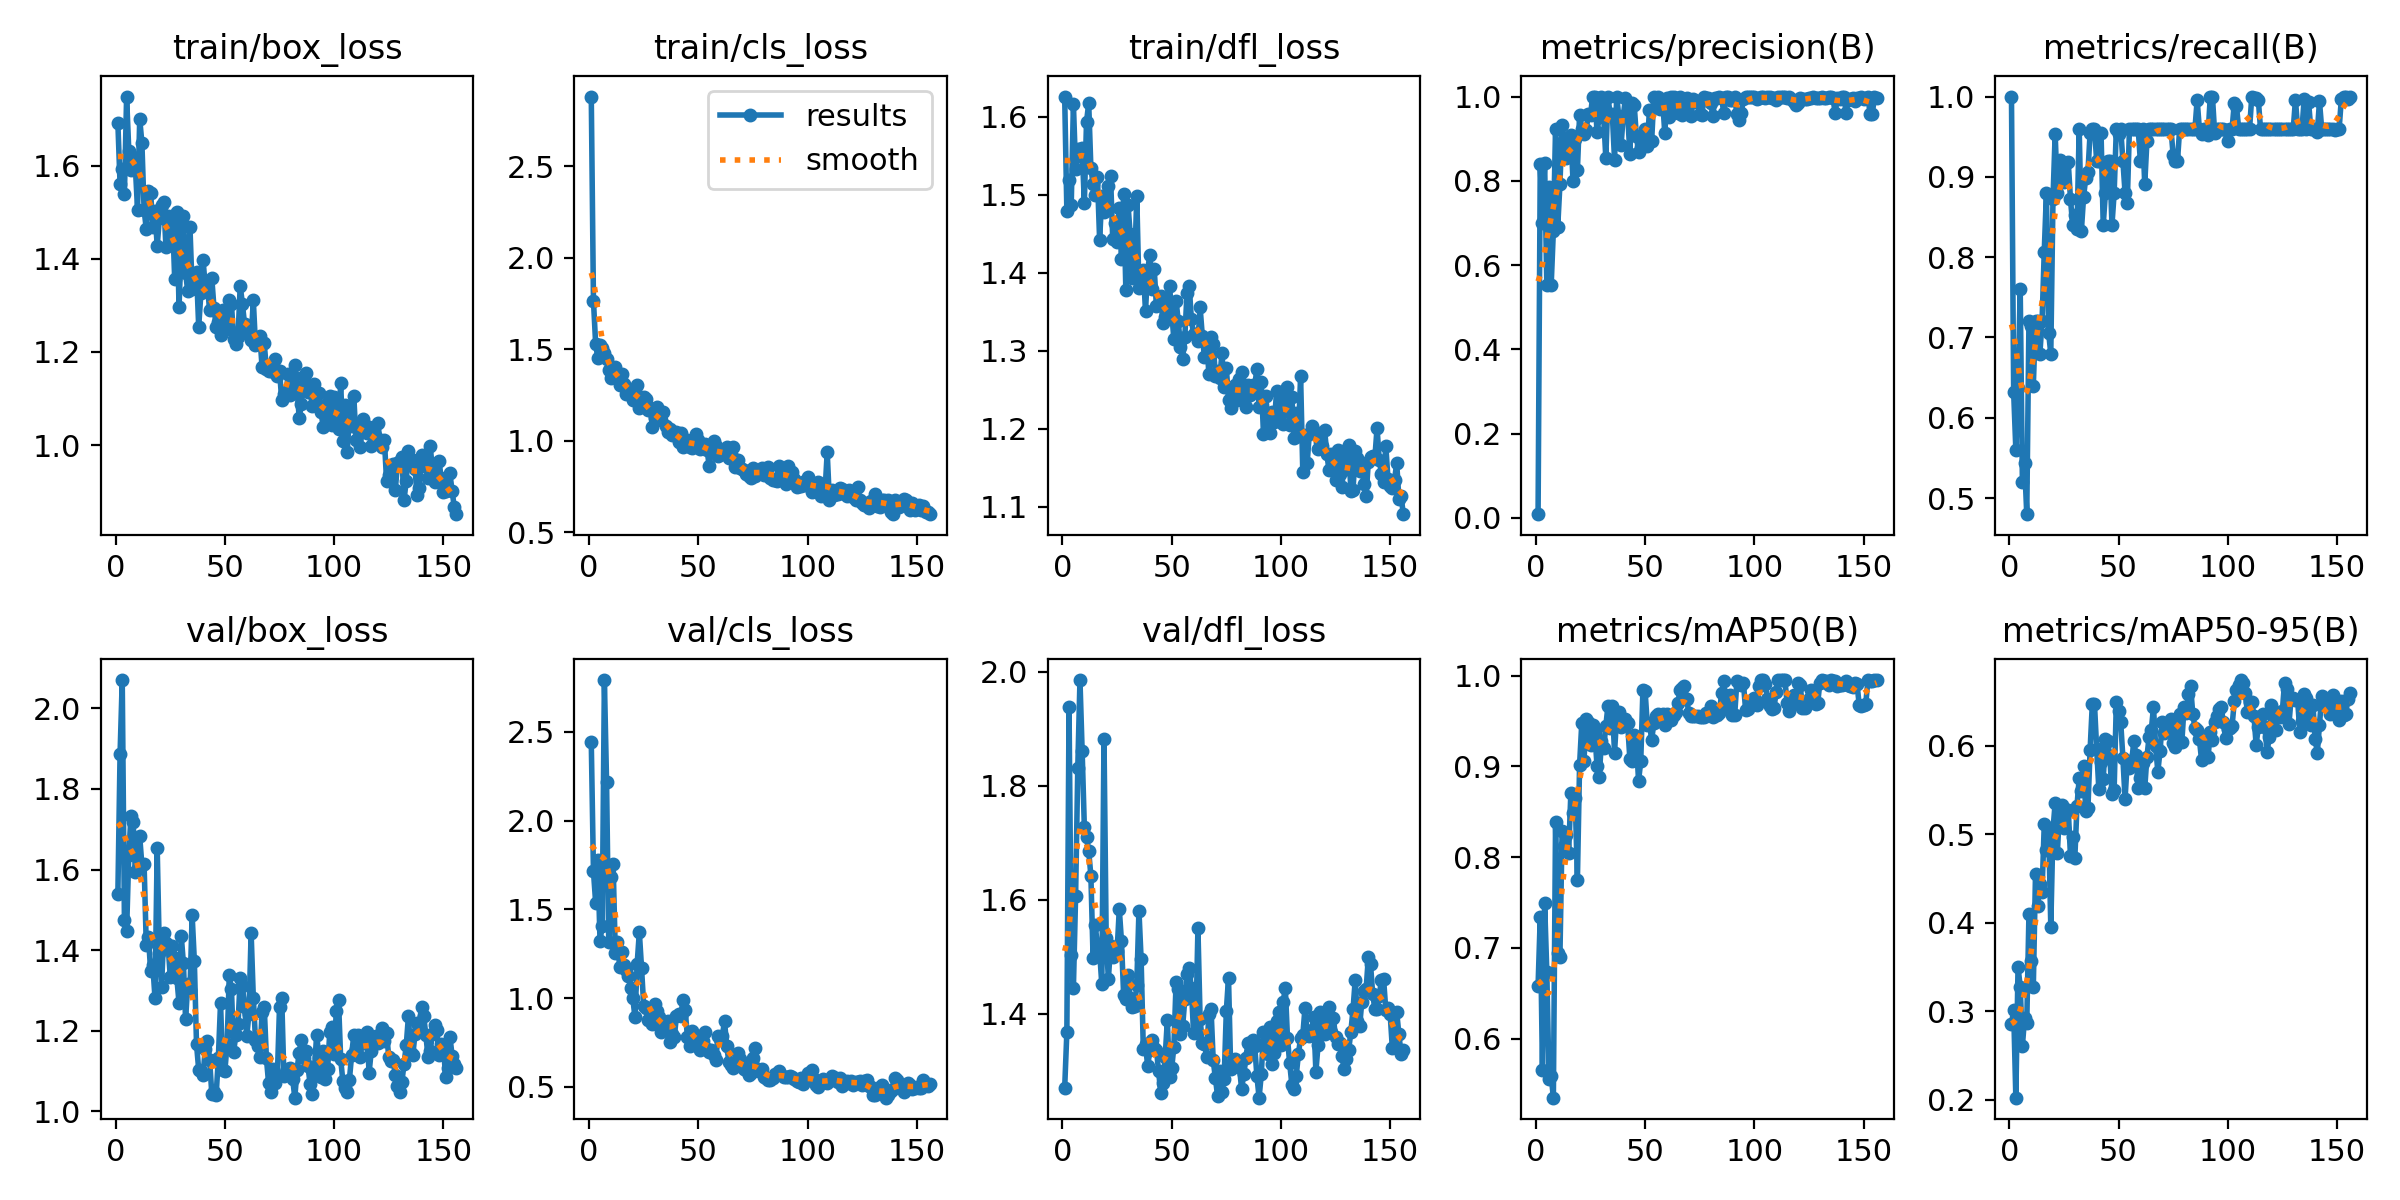

In [13]:
# All results
Image(filename='/content/runs/detect/train/results.png', width=600)

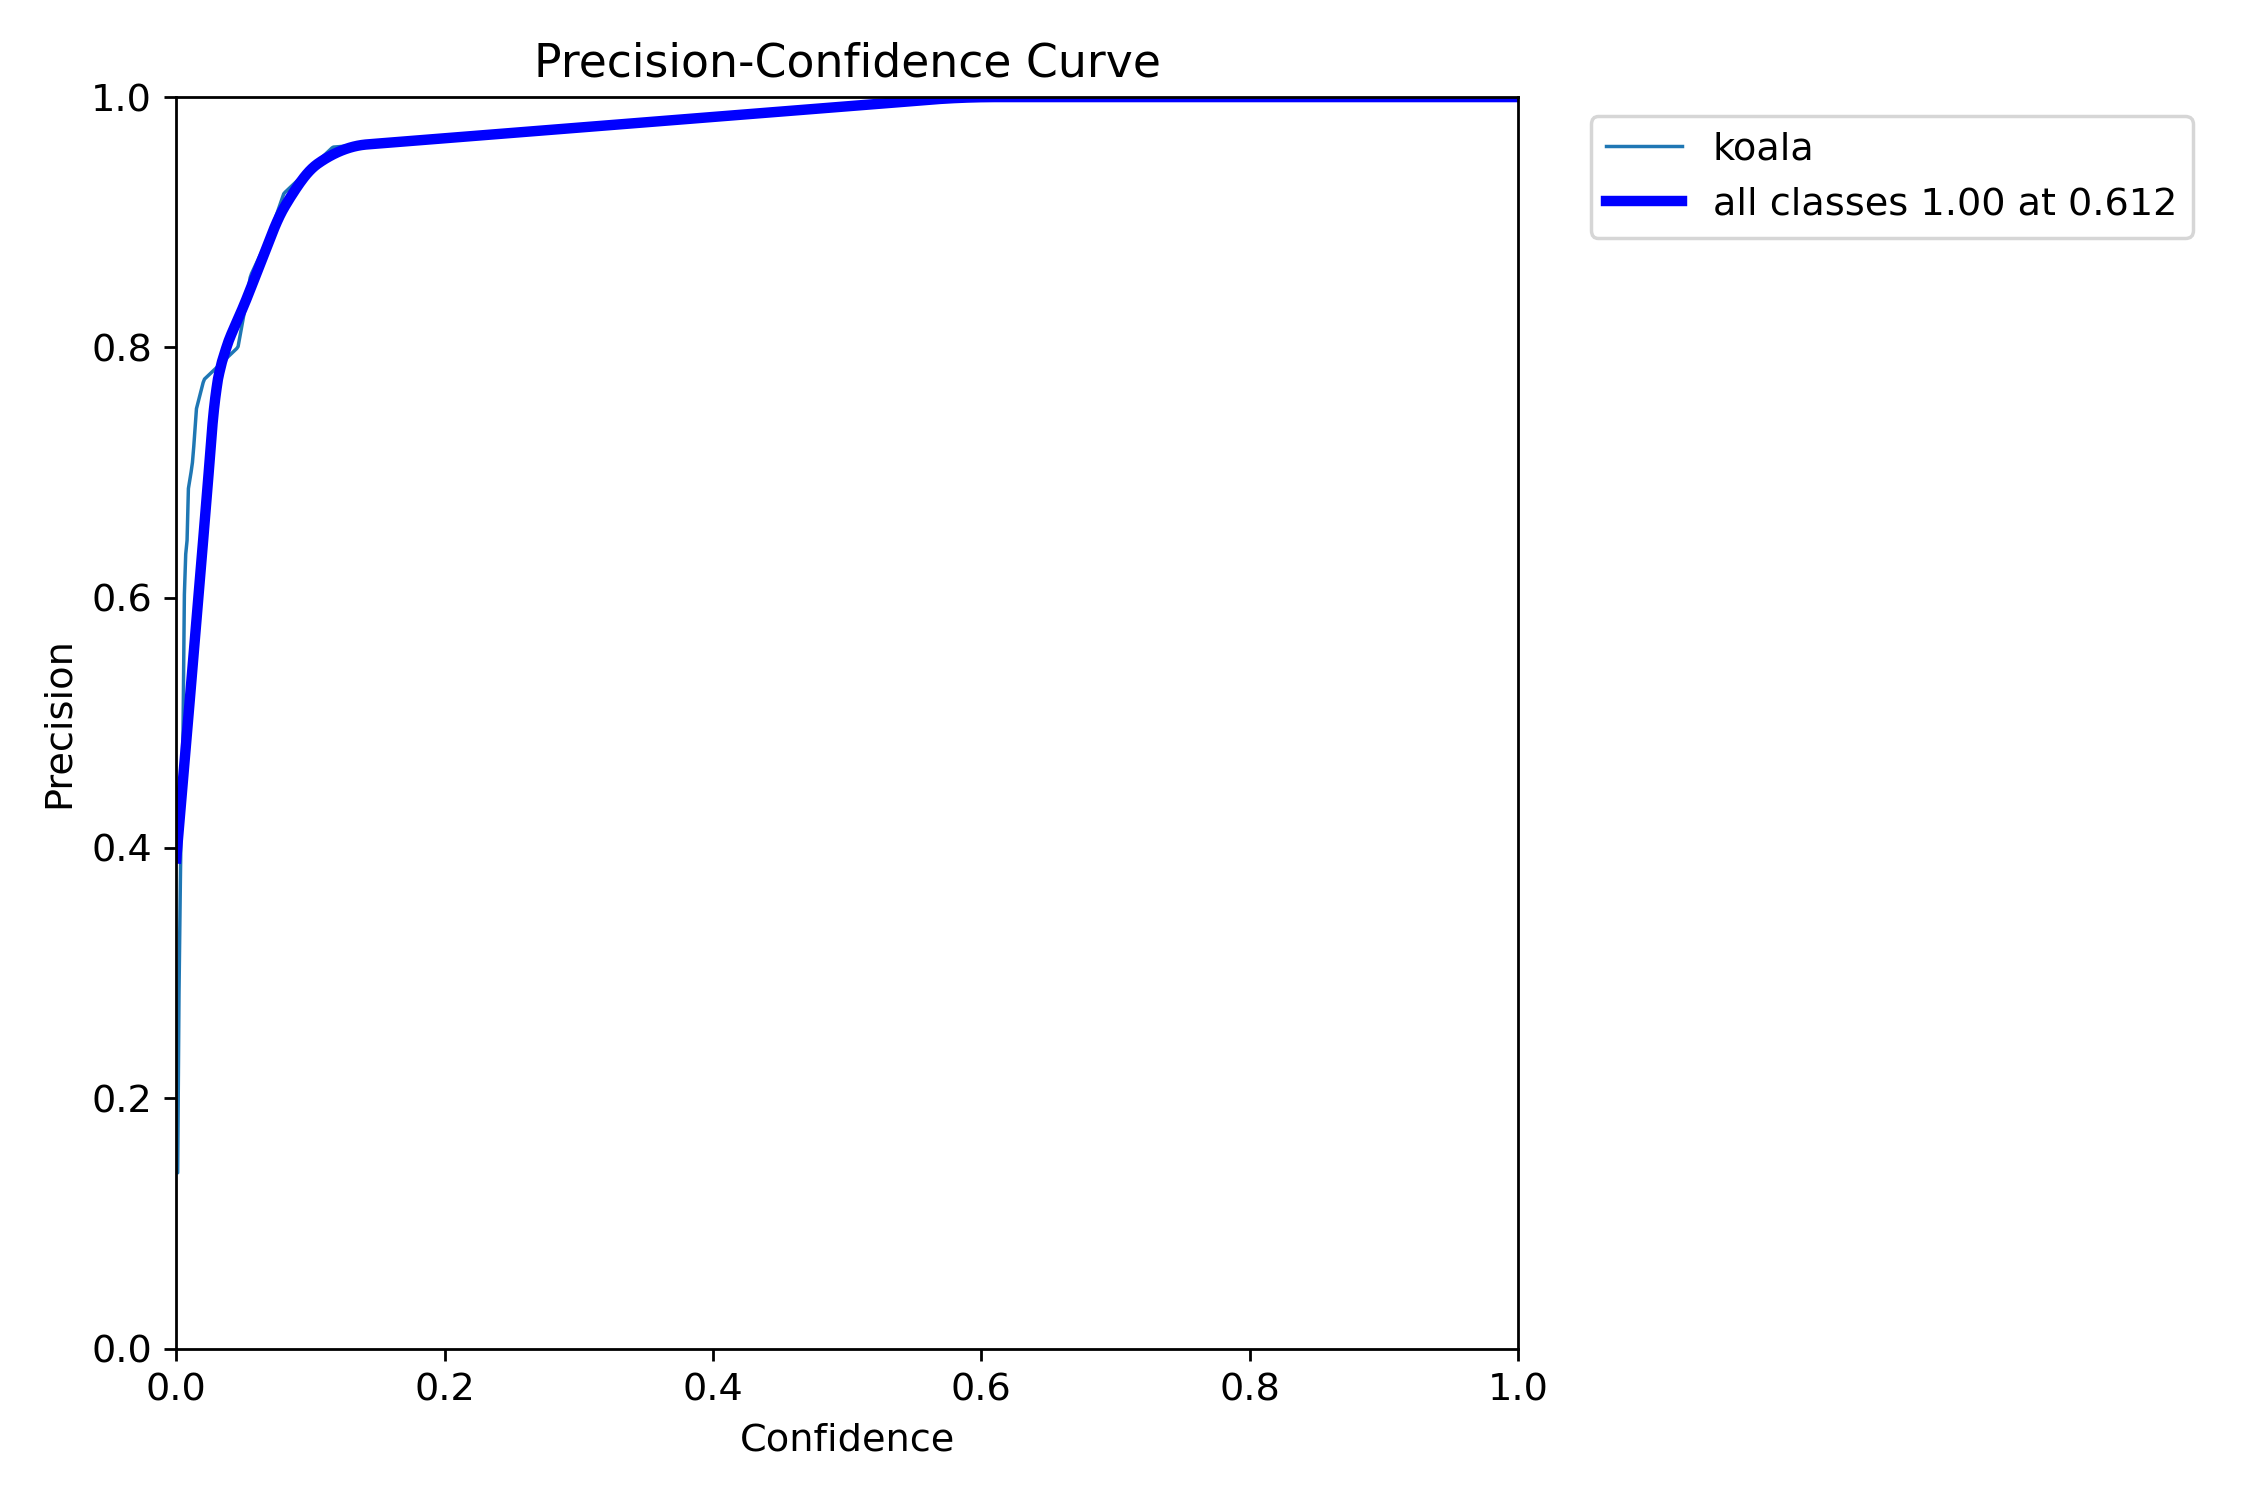

In [14]:
#Precision curve
Image(filename='/content/runs/detect/val/P_curve.png', width=600)

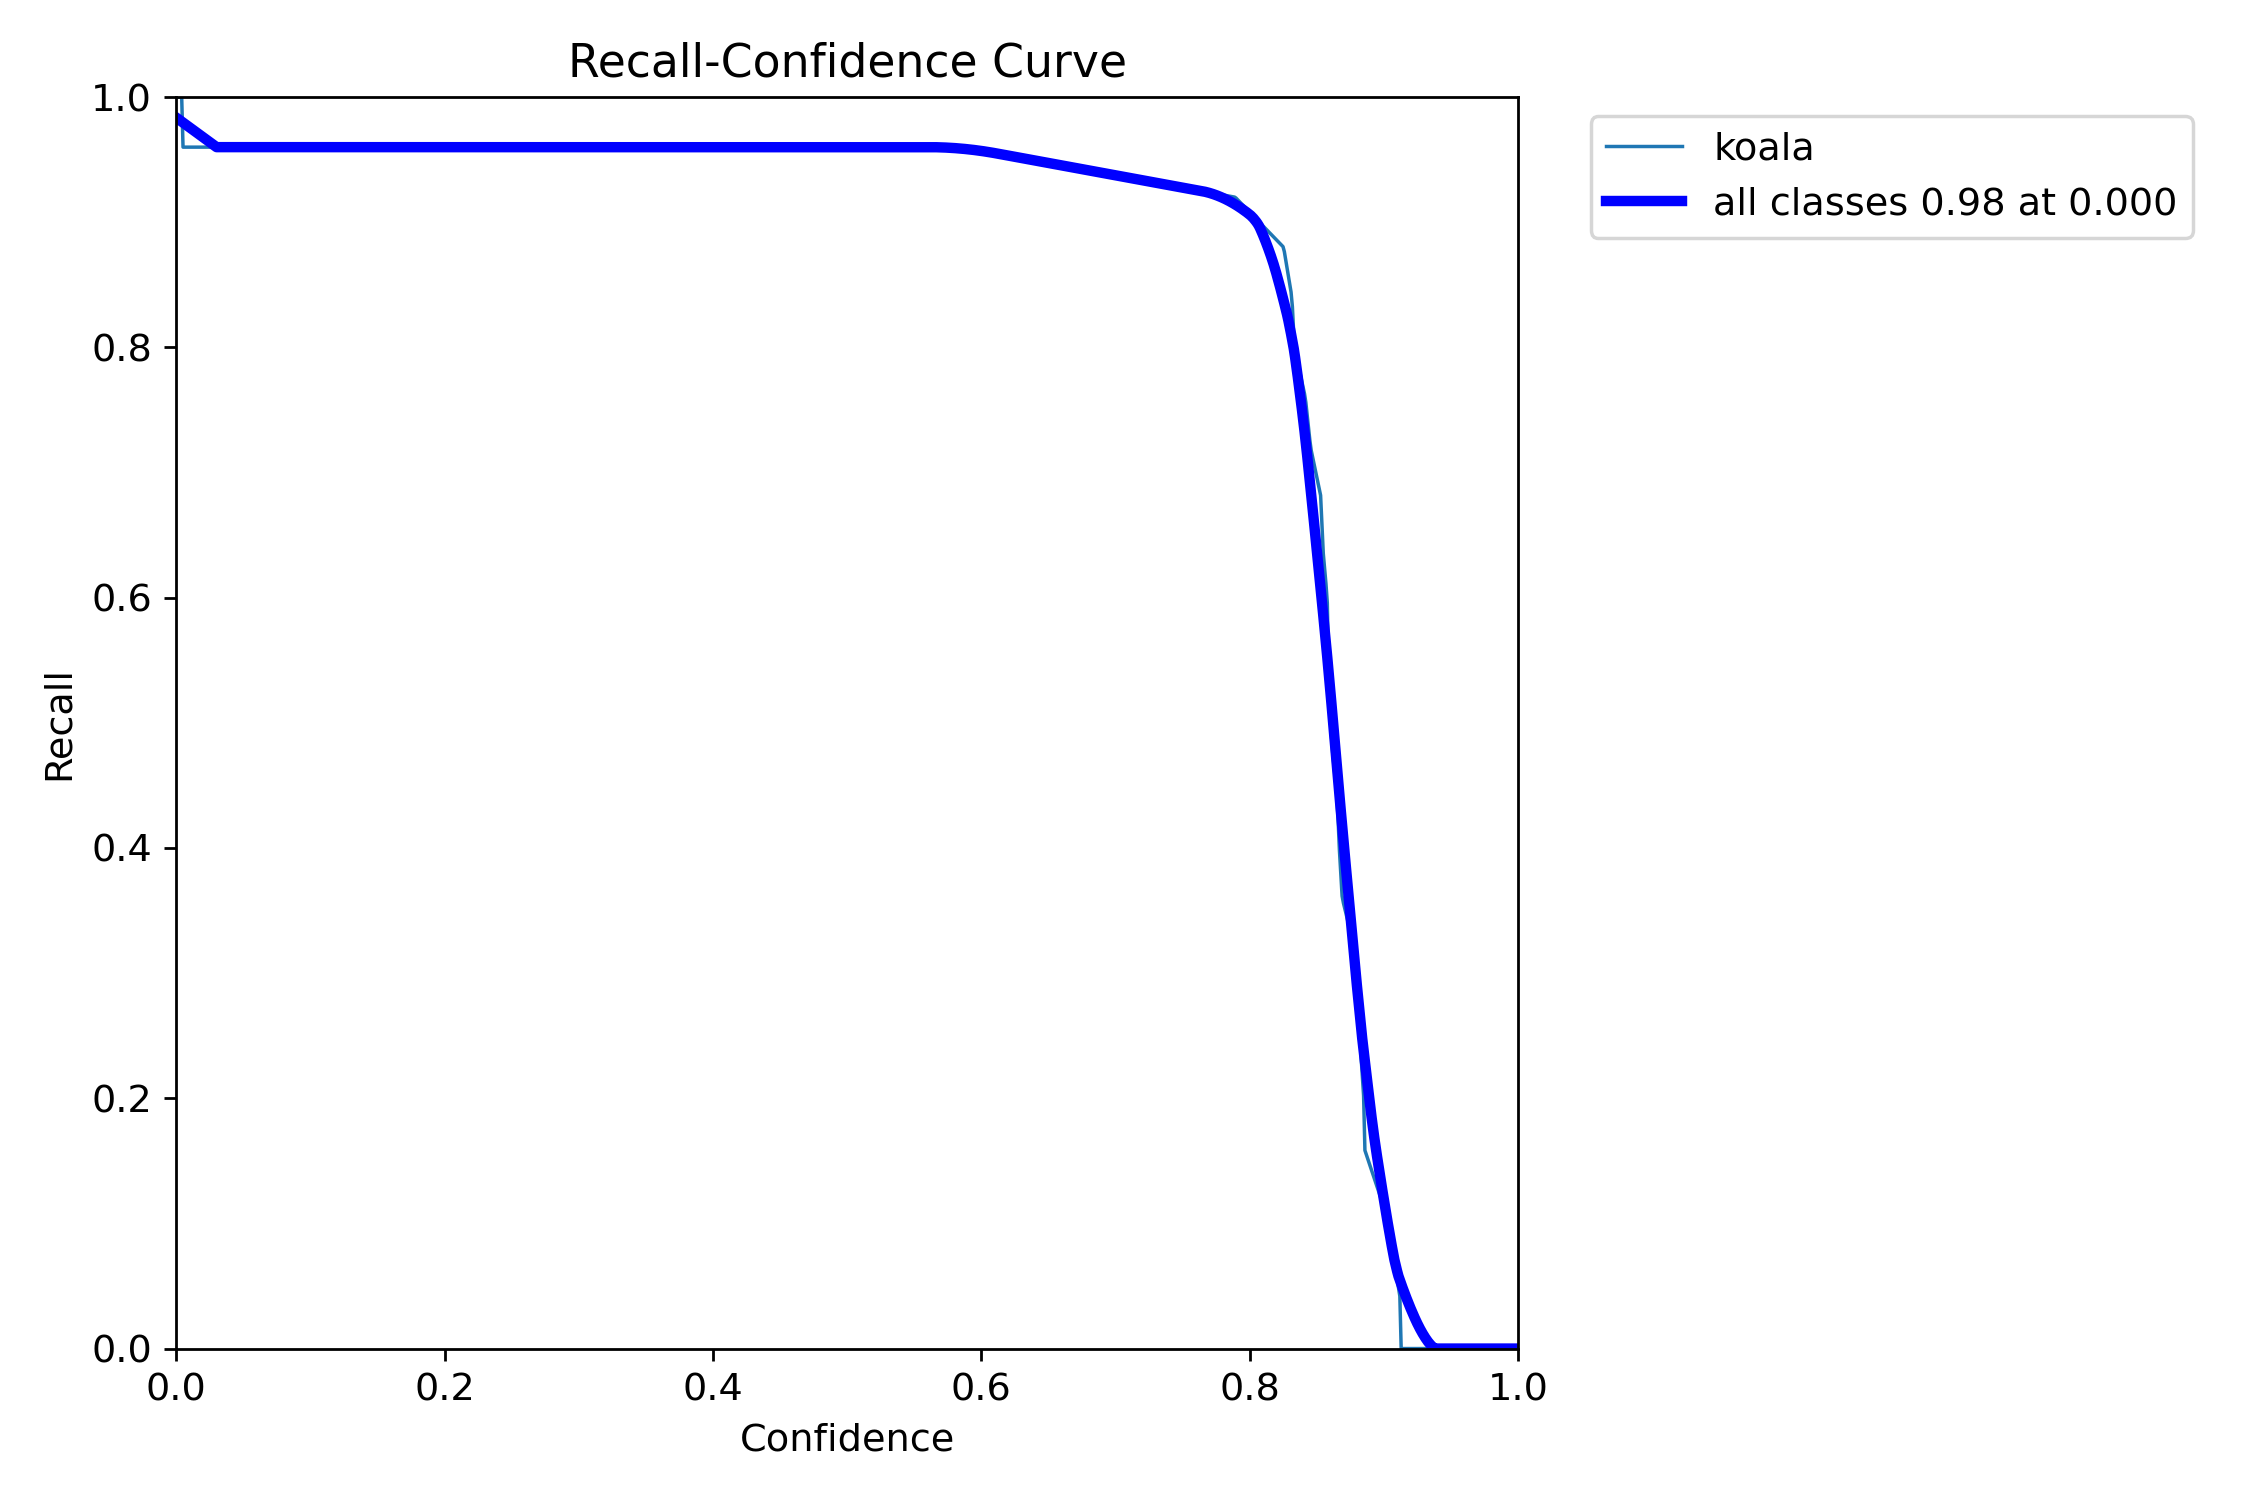

In [15]:
#Recall
Image(filename='/content/runs/detect/val/R_curve.png', width=600)

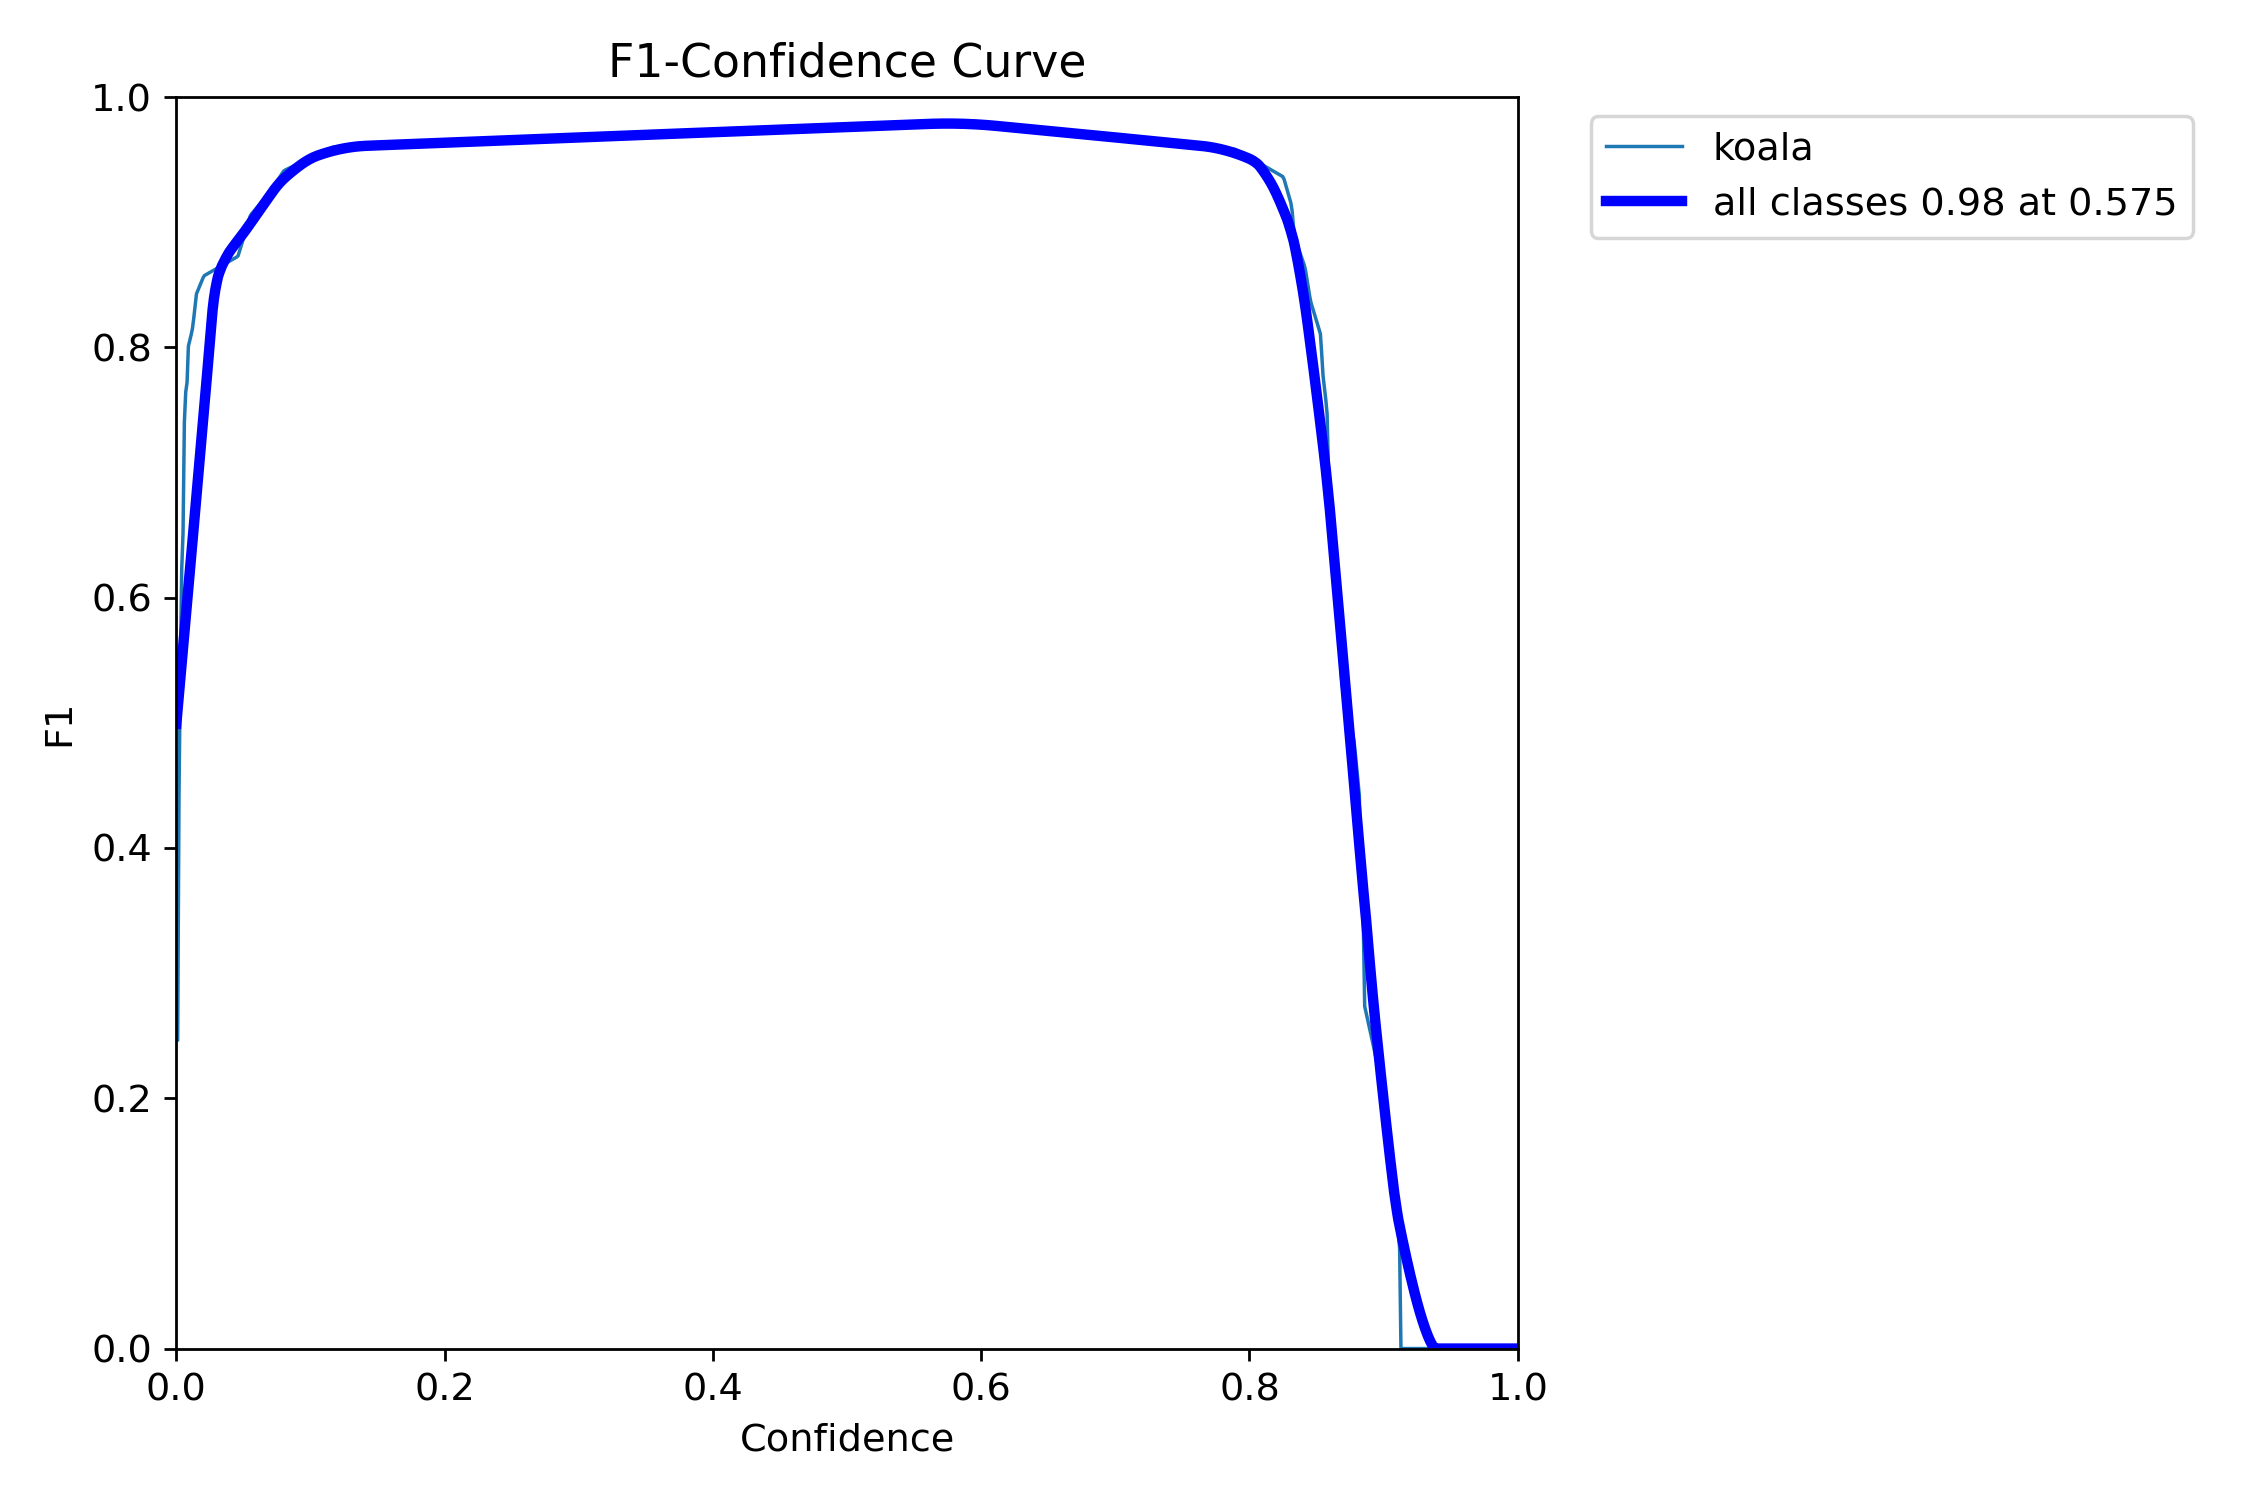

In [16]:
#F1
Image(filename='/content/runs/detect/val/F1_curve.png', width=600)

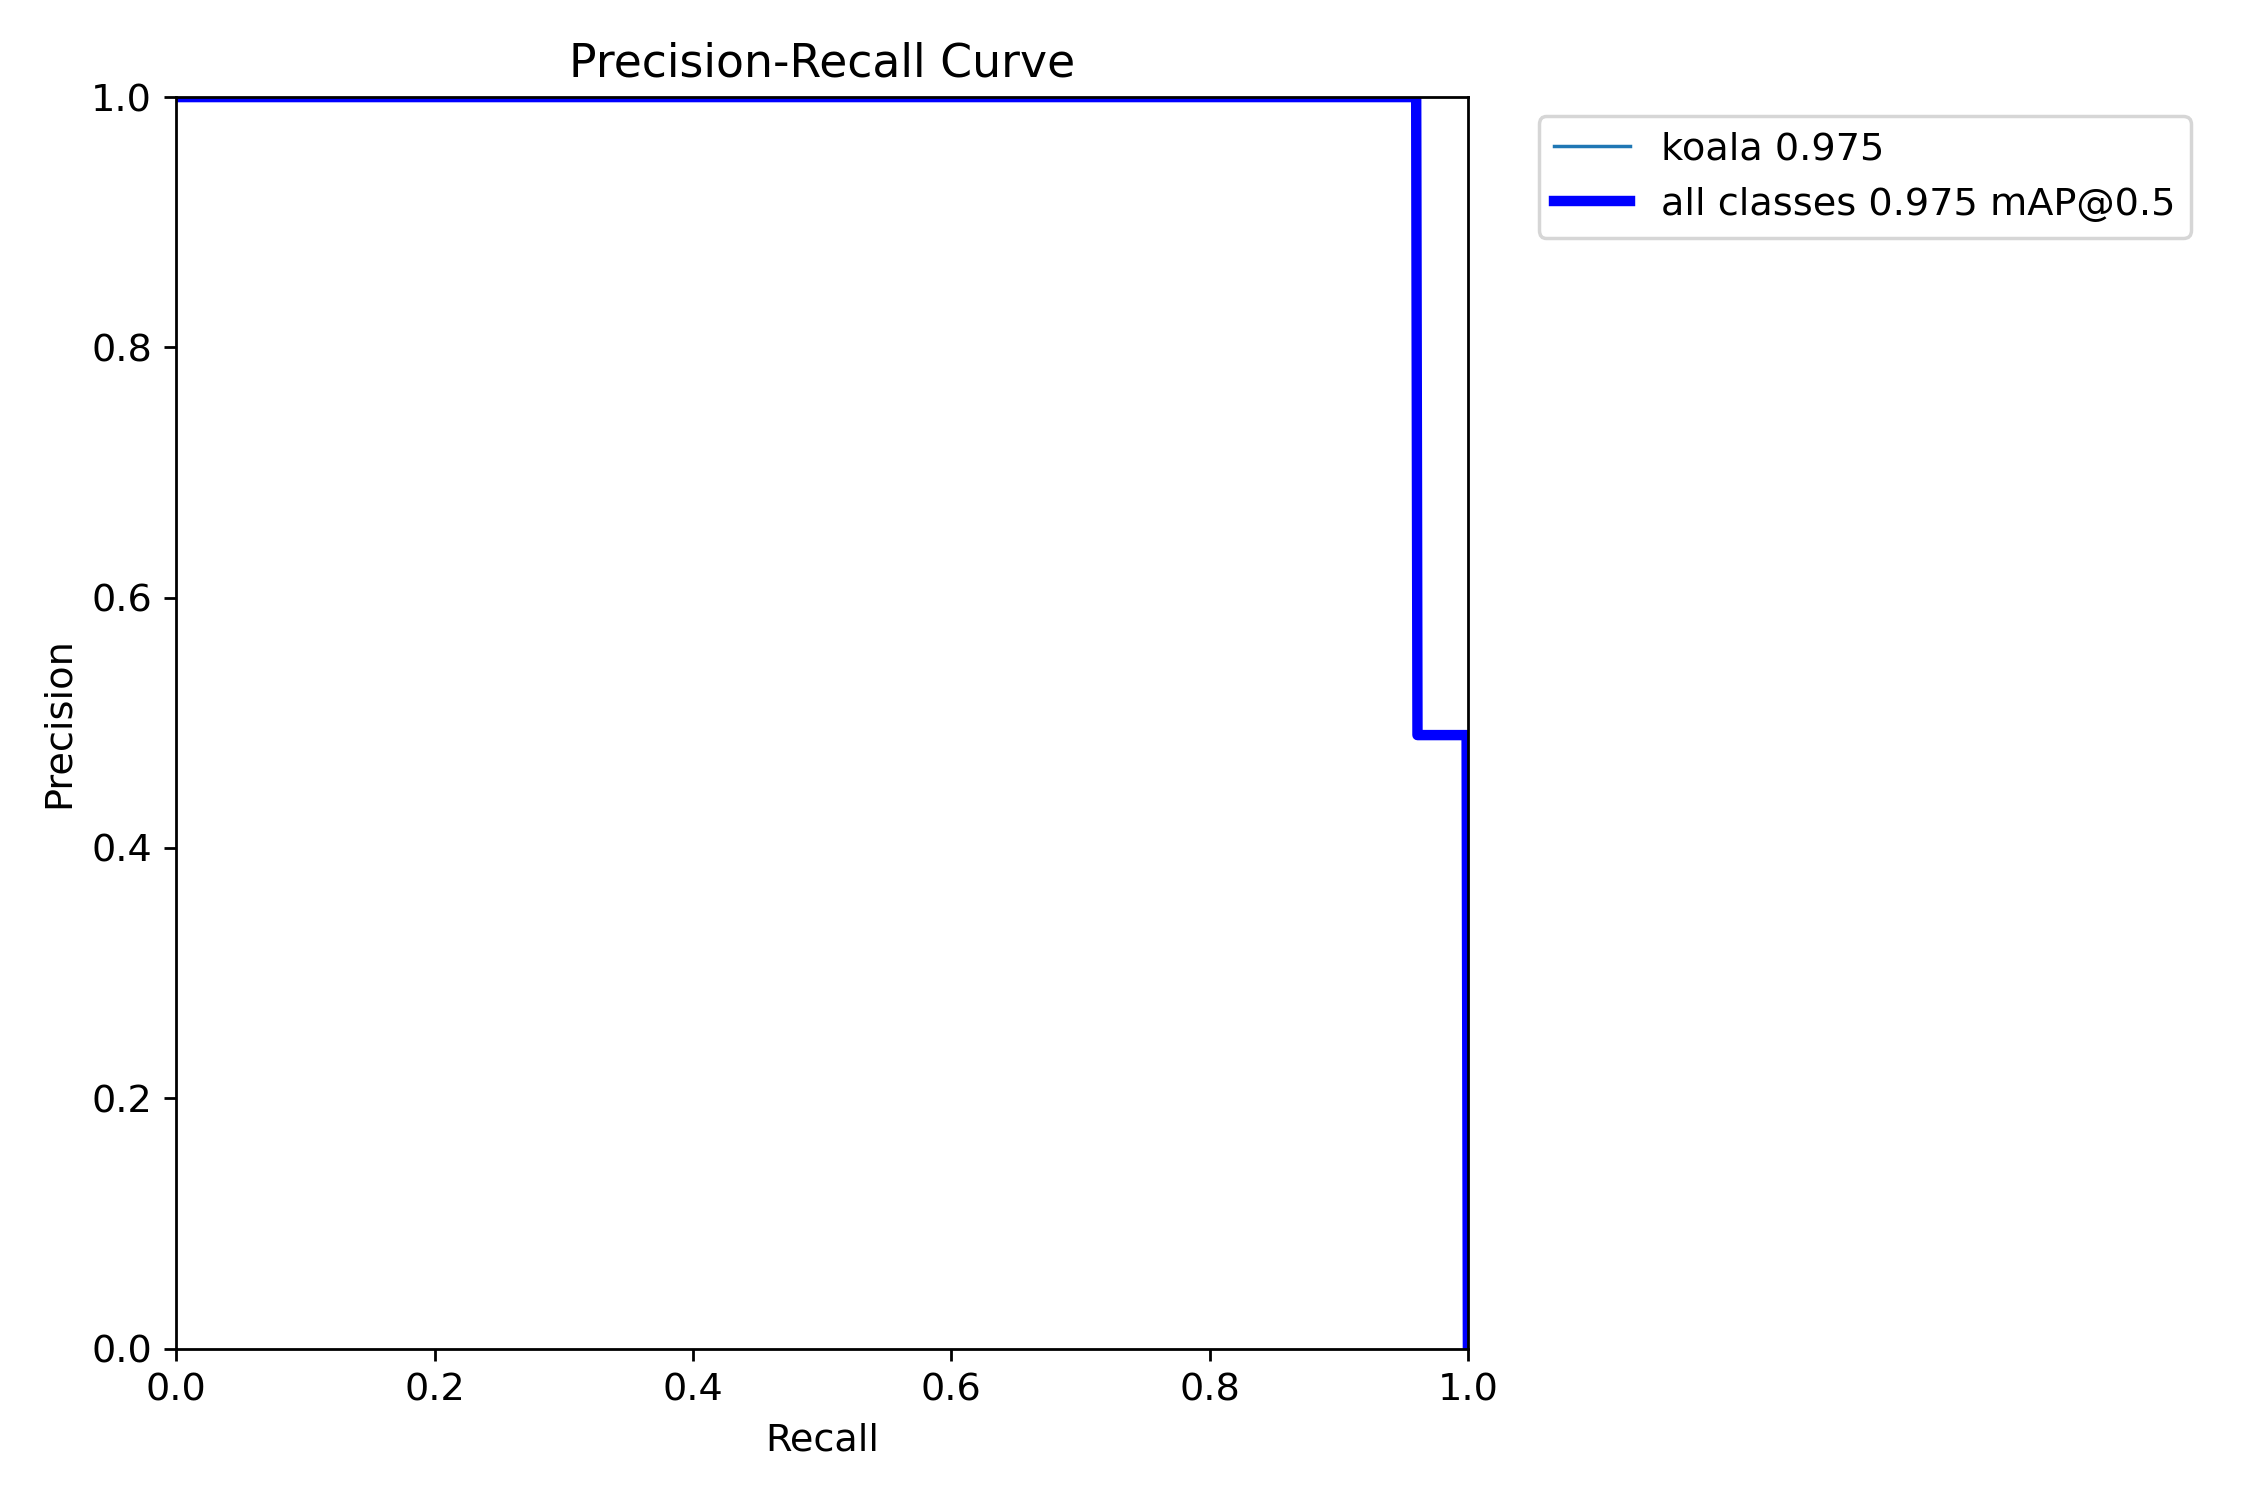

In [17]:
#Precision Recall
Image(filename='/content/runs/detect/val/PR_curve.png', width=600)